In [61]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import pickle

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [64]:
df = pd.read_csv("heart.csv")

In [65]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [66]:
df.shape

(918, 12)

In [67]:
df.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [68]:
df["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [69]:
df.duplicated().sum()

np.int64(0)

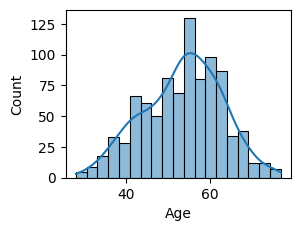

In [70]:
def plotting(var,num):
  plt.subplot(2,2,1)
  sns.histplot(df[var],kde=True)
plotting("Age",1)


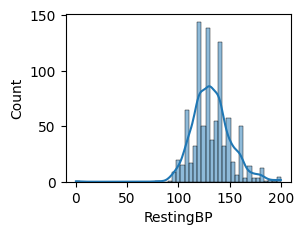

In [71]:
plotting("RestingBP",2)

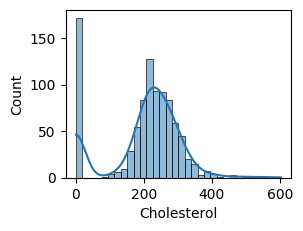

In [72]:
plotting("Cholesterol",3)

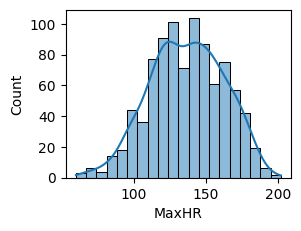

In [73]:
plotting("MaxHR",3)

In [74]:
df[df["Cholesterol"]==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [75]:
chol_mean=df[df['Cholesterol']!=0]['Cholesterol'].mean()
df['Cholesterol']=df['Cholesterol'].replace(0,chol_mean)

In [76]:
df[df["RestingBP"]==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,244.635389,0,Normal,155,N,1.5,Flat,1


In [77]:
restbp_mean=df[df['RestingBP']!=0]['RestingBP'].mean()

df['RestingBP']=df['RestingBP'].replace(0,restbp_mean)

In [78]:
df[df["FastingBS"]==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140.0,241.0,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


In [79]:
fastbs_mean = df[df['FastingBS'] != 0]['FastingBS'].mean()
df['FastingBS'] = df['FastingBS'].replace(0, fastbs_mean)

<Axes: xlabel='Sex', ylabel='count'>

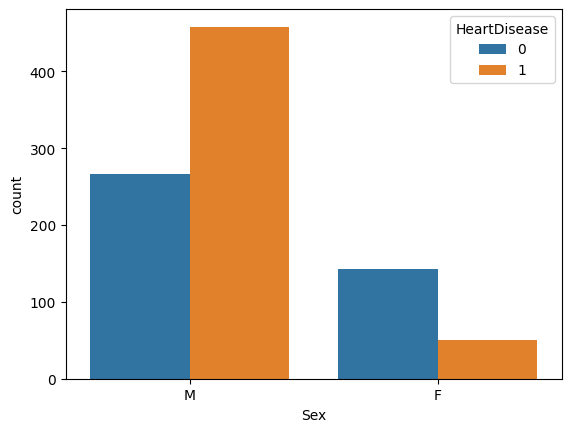

In [80]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

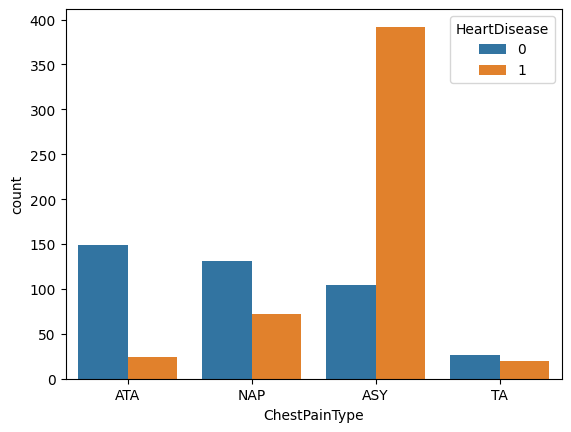

In [81]:
sns.countplot(x=df['ChestPainType'],hue=df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

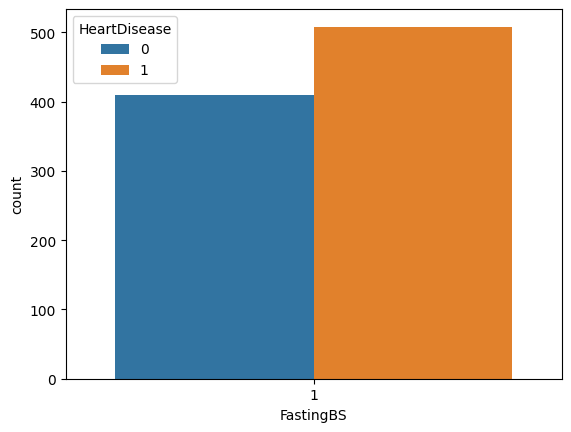

In [82]:
sns.countplot(x=df['FastingBS'],hue=df['HeartDisease'])

<Axes: xlabel='RestingECG', ylabel='count'>

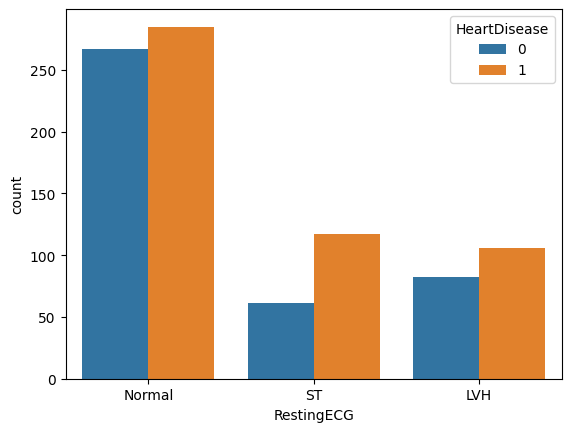

In [83]:
sns.countplot(x=df['RestingECG'],hue=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Age'>

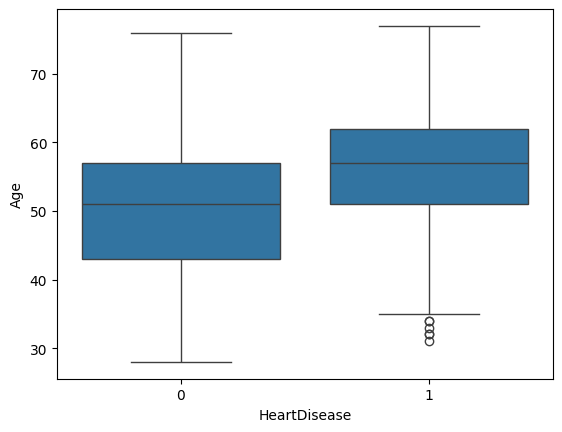

In [84]:
sns.boxplot(x=df['HeartDisease'],y=df['Age'])

<Axes: >

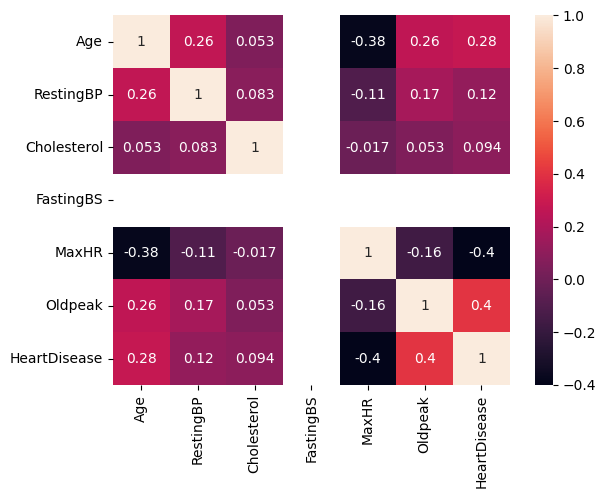

In [85]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [86]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,1,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,1,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,1,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,1,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,1,Normal,122,N,0.0,Up,0


In [87]:

# data preprocessing
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,1,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,1,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,1,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,1,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,1,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,1,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,1,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,1,LVH,174,N,0.0,Flat,1


In [88]:
df_encoded=pd.get_dummies(df,drop_first=True)
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,1,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,1,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,1,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,1,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,1,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,1,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,1,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,1,174,0.0,1,False,True,False,False,False,False,False,True,False


In [89]:
print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [90]:
from sklearn.preprocessing import StandardScaler

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the trained model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model and scaler saved successfully.")

✅ Model and scaler saved successfully.
